<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4 - PCA Lab

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

# Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA 

Explore dataset. Clean data. Find correlation. 

In [3]:

bc = pd.read_csv('../DATA/breast-cancer-wisconsin-data.csv', header = 0, index_col='id')
bc.head().T

id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043
symmetry_mean,0.2419,0.1812,0.2069,0.2597,0.1809


In [4]:
bc.drop(bc.columns[bc.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
bc.head().T

id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043
symmetry_mean,0.2419,0.1812,0.2069,0.2597,0.1809


In [5]:
#Create two separate dataframes for Benign and malignant results
bcb = bc[(bc['diagnosis'] == 'B')]
bcm = bc[(bc['diagnosis'] == 'M')]
missing_rows = ['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst']

bcb[missing_rows].describe().T

,count,mean,std,min,25%,50%,75%,max
concavity_mean,357.0,0.046058,0.043442,0.0,0.020310,0.037090,0.05999,0.41080
concave points_mean,357.0,0.025717,0.015909,0.0,0.015020,0.023440,0.03251,0.08534
concavity_se,357.0,0.025997,0.032918,0.0,0.010990,0.018400,0.03056,0.39600
concave points_se,357.0,0.009858,0.005709,0.0,0.006433,0.009061,0.01187,0.05279
concavity_worst,357.0,0.166238,0.140368,0.0,0.077080,0.141200,0.22160,1.25200
concave points_worst,357.0,0.074444,0.035797,0.0,0.051040,0.074310,0.09749,0.17500


In [6]:
bc.groupby(['diagnosis'])[missing_rows].mean()

,concavity_mean,concave points_mean,concavity_se,concave points_se,concavity_worst,concave points_worst
diagnosis,,,,,,
B,0.046058,0.025717,0.025997,0.009858,0.166238,0.074444
M,0.160775,0.087990,0.041824,0.015060,0.450606,0.182237


In [7]:
bc.groupby(['diagnosis'])[missing_rows].median()

,concavity_mean,concave points_mean,concavity_se,concave points_se,concavity_worst,concave points_worst
diagnosis,,,,,,
B,0.03709,0.02344,0.018400,0.009061,0.1412,0.07431
M,0.15135,0.08628,0.037125,0.014205,0.4049,0.18200


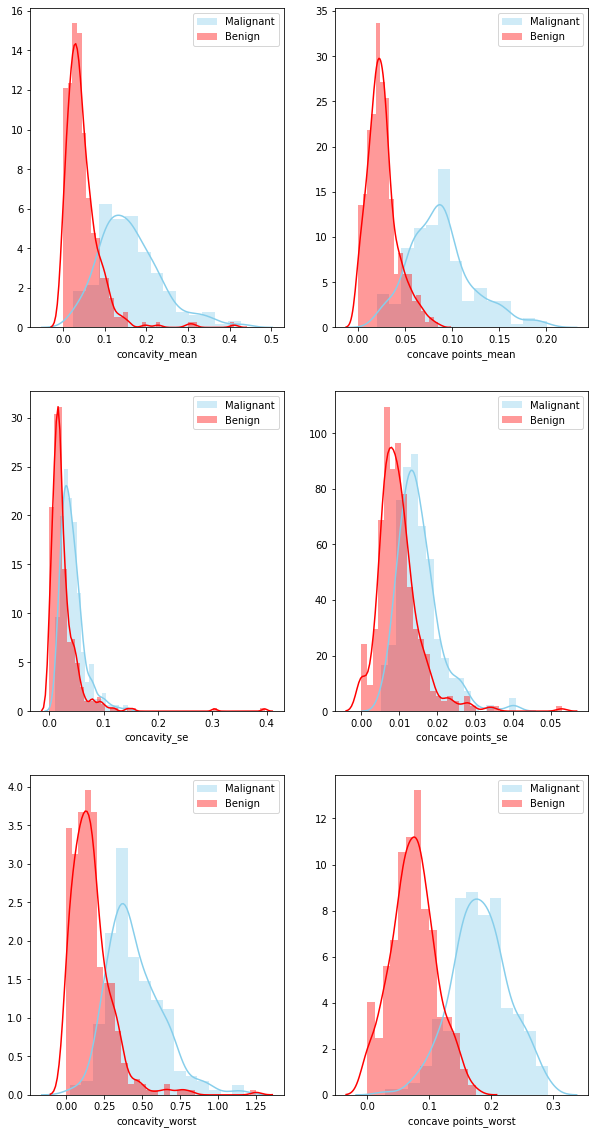

In [8]:
#Visualize the distribution of the missing metrics
plt.figure(figsize=(10,20))
plt.subplot(3,2,1)
sns.distplot( bcm['concavity_mean'] , color="skyblue", label="Malignant")
sns.distplot( bcb['concavity_mean'] , color="red", label="Benign")
plt.legend()
plt.subplot(3,2,2)
sns.distplot( bcm['concave points_mean'] , color="skyblue", label="Malignant")
sns.distplot( bcb['concave points_mean'] , color="red", label="Benign")
plt.legend()
plt.subplot(3,2,3)
sns.distplot( bcm['concavity_se'] , color="skyblue", label="Malignant")
sns.distplot( bcb['concavity_se'] , color="red", label="Benign")
plt.legend()
plt.subplot(3,2,4)
sns.distplot( bcm['concave points_se'] , color="skyblue", label="Malignant")
sns.distplot( bcb['concave points_se'] , color="red", label="Benign")
plt.legend()
plt.subplot(3,2,5)
sns.distplot( bcm['concavity_worst'] , color="skyblue", label="Malignant")
sns.distplot( bcb['concavity_worst'] , color="red", label="Benign")
plt.legend()
plt.subplot(3,2,6)
sns.distplot( bcm['concave points_worst'] , color="skyblue", label="Malignant")
sns.distplot( bcb['concave points_worst'] , color="red", label="Benign")
plt.legend()

In [10]:
#replace zero values with np.nan
bc[missing_rows] = bc[missing_rows].replace(0, np.nan)
bc.isnull().sum()

diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [11]:
bc['concavity_mean'].fillna(bc.groupby(['diagnosis'])['concavity_mean'].transform(np.median), inplace=True)
bc['concave points_mean'].fillna(bc.groupby(['diagnosis'])['concave points_mean'].transform(np.median), inplace=True)
bc['concavity_se'].fillna(bc.groupby(['diagnosis'])['concavity_se'].transform(np.median), inplace=True)
bc['concave points_se'].fillna(bc.groupby(['diagnosis'])['concave points_se'].transform(np.median), inplace=True)
bc['concavity_worst'].fillna(bc.groupby(['diagnosis'])['concavity_worst'].transform(np.median), inplace=True)
bc['concave points_worst'].fillna(bc.groupby(['diagnosis'])['concave points_worst'].transform(np.median), inplace=True)

In [12]:
bc.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
#Convert diagnosis results to numerical
bc['diagnosis'].replace({'B' : 0, 'M' : 1}, inplace = True)

# Subset & Normalize

Subset the data to only include all columns except diagnosis. We will be comparing the principal components to age specifically, so we are leaving age out.

In [14]:
# ANSWER
components = bc.drop(columns = 'diagnosis')
components

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.265400,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.186000,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.243000,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.257500,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.162500,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.221600,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.162800,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.053020,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.141800,0.2218,0.07820


# Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [16]:
# ANSWER
corrm = components.corr()

## Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [18]:
# ANSWER
eigenvalues, eigenvectors = np.linalg.eig(corrm)

print(eigenvalues)
print(eigenvectors)

[1.32371539e+01 5.72369079e+00 2.85480932e+00 1.97811853e+00
 1.61586328e+00 1.20671184e+00 6.56058397e-01 4.79084101e-01
 4.04867319e-01 3.59487644e-01 2.90559101e-01 2.61651288e-01
 2.37993123e-01 1.85797744e-01 9.72726800e-02 8.08581609e-02
 5.94862779e-02 5.30422137e-02 5.08851487e-02 1.33026651e-04
 7.48813665e-04 1.58946038e-03 6.96065774e-03 8.34241330e-03
 1.56404829e-02 1.79266926e-02 2.53851932e-02 3.12300494e-02
 2.88679920e-02 2.97843794e-02]
[[ 2.17933656e-01 -2.35385841e-01  7.87423867e-03 -4.14314197e-02
   4.40077541e-02 -1.70986741e-02  1.37863918e-01  5.53541238e-04
  -2.21561068e-01  8.04344912e-02 -6.15128199e-02  4.89056893e-02
  -2.25390247e-02 -6.60017621e-02  3.23804990e-02  1.59889546e-01
   2.33984542e-01  2.11412150e-01  5.81051934e-02 -7.02513797e-01
  -2.11305415e-01 -2.10385662e-01  1.38061786e-01  1.21821924e-01
   1.86761642e-02  1.82333799e-01 -8.71577677e-02 -6.25175629e-02
  -1.28102489e-01 -1.42477675e-02]
 [ 1.05419855e-01 -5.85136680e-02 -6.0816033

In [19]:
eigenvalues.sum()

30.000000000000018

## Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

$$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [20]:
def calculate_cum_var_exp(eig_vals):
    
    cum_var_exp = []
    #Calculate Explained Variance from Eigenvalues
    for i in eig_vals :
        expvar = (i/(eig_vals.sum()))*100
        cum_var_exp.append(expvar)
    
    return cum_var_exp

In [21]:
calculate_cum_var_exp(eigenvalues)

[44.123846248601296,
 19.078969316131705,
 9.516031066869633,
 6.593728434038312,
 5.386210945455793,
 4.022372792668593,
 2.1868613237984484,
 1.5969470020356475,
 1.3495577292254524,
 1.1982921461192793,
 0.9685303379577639,
 0.8721709590439745,
 0.7933104103017233,
 0.6193258133721005,
 0.32424226658862326,
 0.2695272030925739,
 0.19828759288453593,
 0.1768073789897052,
 0.16961716236470276,
 0.00044342217080385176,
 0.0024960455493759494,
 0.005298201267512541,
 0.023202192454769906,
 0.027808044342031664,
 0.052134942892997506,
 0.05975564184330899,
 0.08461731054490067,
 0.10410016481165428,
 0.0962266398341667,
 0.09928126474862708]

In [23]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('Cumulative Variance Explained (%)', fontsize=16)
    ax.set_xlabel('No. of Components', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('Component vs Cumulative Variance Explained\n', fontsize=20)

    plt.show()

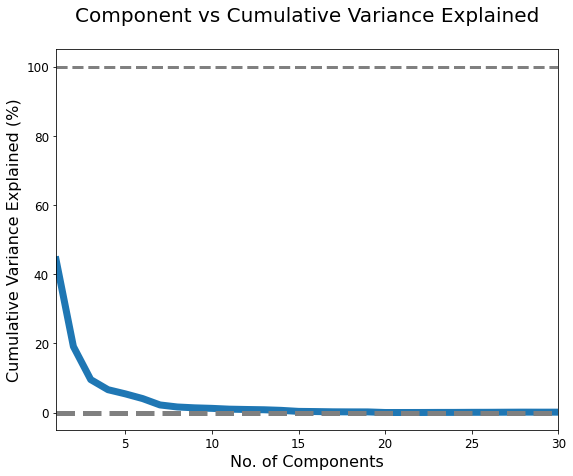

In [24]:
plot_var_exp(eigenvalues)

# Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [26]:
len(components.columns)

30

In [61]:
#scaling data 
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(components)

In [62]:

# ANSWER
from sklearn.decomposition import PCA
    
# Create an instance of PCA
n = len(components.columns)
pca = PCA(n_components=n)

# Fit Xs
pca.fit(X)


PCA(n_components=30)

In [71]:
pca.explained_variance_ratio_

array([4.41238462e-01, 1.90789693e-01, 9.51603107e-02, 6.59372843e-02,
       5.38621095e-02, 4.02237279e-02, 2.18686132e-02, 1.59694700e-02,
       1.34955773e-02, 1.19829215e-02, 9.68530338e-03, 8.72170959e-03,
       7.93310410e-03, 6.19325813e-03, 3.24242267e-03, 2.69527203e-03,
       1.98287593e-03, 1.76807379e-03, 1.69617162e-03, 1.04100165e-03,
       9.92812647e-04, 9.62266398e-04, 8.46173105e-04, 5.97556418e-04,
       5.21349429e-04, 2.78080443e-04, 2.32021925e-04, 5.29820127e-05,
       2.49604555e-05, 4.43422171e-06])

([<matplotlib.axis.XTick at 0x201aa2da670>,
 <a list of 30 Text major ticklabel objects>)

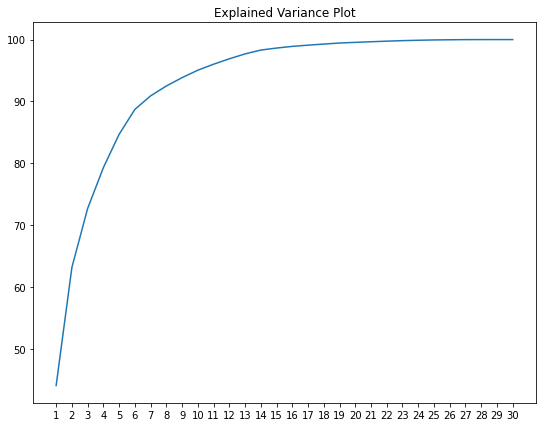

In [72]:
# ANSWER
# Plot explained_variance_
expvar =100* (np.cumsum(pca.explained_variance_ratio_))

component_number = [i+1 for i in range(len(expvar))]

plt.figure(figsize= (9,7))
sns.lineplot(x=component_number, y=expvar)
plt.title("Explained Variance Plot")
plt.xticks(component_number)

In [43]:
# ANSWER
# Apply dimensionality reduction to Xs using transform

pca2 = PCA(n_components=2)
principalcomponents = pca2.fit_transform(X)


principalDf = pd.DataFrame(data = principalcomponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,9.221041,1.889779
1,2.358136,-3.788304
2,5.741023,-1.091011
3,7.175792,10.200579
4,3.924414,-1.940305
...,...,...
564,6.451832,-3.549726
565,3.793626,-3.563623
566,1.233268,-1.890594
567,10.412785,1.623177


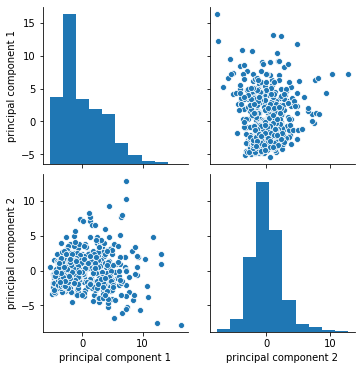

In [45]:
# ANSWER
# Create PairPlot of PCA

sns.pairplot(principalDf)

## Split Data to 80/20 and Use PCA you gon in 6 as X

Split data 80/20 and Use KNN to find score.

In [54]:
# ANSWER
# Split Data

from sklearn.model_selection import train_test_split
y= bc['diagnosis']
X = principalcomponents

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
# ANSWER
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [56]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9298245614035088


## Test with original 30 component data

In [57]:
y= bc['diagnosis']
X = components

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9122807017543859


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)

© 2019 Institute of Data